<a href="https://colab.research.google.com/github/jwtan0421/ai_llm/blob/main/12-fine-tuning-01/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# if package errors, try below
!pip cache purge
!pip install accelerate -U
!pip install transformers[torch]
!pip install datasets

Files removed: 39
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 309.4/309.4 kB 6.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 23.7/23.7 MB 59.2 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 823.6/823.6 kB 55.5 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 14.1/14.1 MB 87.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 731.7/731.7 MB 2.4 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 410.6/410.6 MB 3.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ

In [2]:
import datasets
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModel
from transformers import AutoModelForCausalLM
from transformers import TrainingArguments, Seq2SeqTrainingArguments
from transformers import Trainer, Seq2SeqTrainer
import transformers
from transformers import DataCollatorWithPadding
from transformers import TextGenerationPipeline
import torch
import numpy as np
import os, re
from tqdm import tqdm
import torch.nn as nn

In [3]:
MAX_LEN=32           # ÊúÄÂ§ßÈïøÂ∫¶
SEED=42             # ÈöèÊú∫ÁßçÂ≠ê
LR=2e-5             # Â≠¶‰π†Áéá
BATCH_SIZE=8          # BATCH_SIZE
WARMUP_RATIO=0.1        # warmupÊØî‰æã
INTERVAL=100          # ÊØèÂ§öÂ∞ëÊ≠•Êâì‰∏ÄÊ¨° log / ÂÅö‰∏ÄÊ¨° eval

In [4]:
MODEL_NAME = "gpt2"                     # Ê®°ÂûãÂêçÁß∞
# MODEL_NAME = "gpt2-large"

In [5]:
DATASET_NAME = "rotten_tomatoes"        # Êï∞ÊçÆÈõÜÂêçÁß∞
DATA_BODY_KEY = "text"
DATA_LABEL_KEY = "label"

In [6]:
# Âä†ËΩΩÊï∞ÊçÆÈõÜ
raw_datasets = load_dataset(DATASET_NAME)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/8530 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1066 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1066 [00:00<?, ? examples/s]

In [7]:
# ËÆ≠ÁªÉÈõÜ
raw_train_dataset = raw_datasets["train"]

In [8]:
# È™åËØÅÈõÜ
raw_valid_dataset = raw_datasets["validation"]

In [9]:
columns = raw_train_dataset.column_names

In [10]:
import json


def print_json(data):
    """
    ÊâìÂç∞ÂèÇÊï∞„ÄÇÂ¶ÇÊûúÂèÇÊï∞ÊòØÊúâÁªìÊûÑÁöÑÔºàÂ¶ÇÂ≠óÂÖ∏ÊàñÂàóË°®ÔºâÔºåÂàô‰ª•Ê†ºÂºèÂåñÁöÑ JSON ÂΩ¢ÂºèÊâìÂç∞Ôºõ
    Âê¶ÂàôÔºåÁõ¥Êé•ÊâìÂç∞ËØ•ÂÄº„ÄÇ
    """
    if hasattr(data, 'model_dump_json'):
        data = json.loads(data.model_dump_json())

    if (isinstance(data, (list))):
        for item in data:
            print_json(item)
    elif (isinstance(data, (dict))):
        print(json.dumps(
            data,
            indent=4,
            ensure_ascii=False
        ))
    else:
        print(data)

In [12]:
print_json(raw_train_dataset[:2])

{
    "text": [
        "the rock is destined to be the 21st century's new \" conan \" and that he's going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .",
        "the gorgeously elaborate continuation of \" the lord of the rings \" trilogy is so huge that a column of words cannot adequately describe co-writer/director peter jackson's expanded vision of j . r . r . tolkien's middle-earth ."
    ],
    "label": [
        1,
        1
    ]
}


In [13]:
# ËÆæÁΩÆÈöèÊú∫ÁßçÂ≠ê
transformers.set_seed(SEED)

In [14]:
# ÂÆö‰πâtokenizer
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME,trust_remote_code=True)
tokenizer.add_special_tokens({'pad_token': '[PAD]'})
tokenizer.pad_token_id = 0

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [15]:
named_labels = ['neg','pos']

In [16]:
# Ê†áÁ≠æËΩ¨ token_id
label_ids = [
    tokenizer(named_labels[i],add_special_tokens=False)["input_ids"][0]
    for i in range(len(named_labels))
]

In [17]:
label_ids

[12480, 1930]

In [18]:
# ÂÆö‰πâÊï∞ÊçÆÂ§ÑÁêÜÂáΩÊï∞ÔºåÊääÂéüÂßãÊï∞ÊçÆËΩ¨Êàêinput_ids, attention_mask, labels
def process_fn(examples):
    model_inputs = {
            "input_ids": [],
            "attention_mask": [],
            "labels": [],
        }
    for i in range(len(examples[DATA_BODY_KEY])):
        inputs = tokenizer(examples[DATA_BODY_KEY][i],add_special_tokens=False)
        label = label_ids[examples[DATA_LABEL_KEY][i]]
        input_ids = inputs["input_ids"] + [tokenizer.eos_token_id, label]

        raw_len = len(input_ids)
        input_len = len(inputs["input_ids"]) + 1

        if raw_len >= MAX_LEN:
            input_ids = input_ids[-MAX_LEN:]
            attention_mask = [1] * MAX_LEN
            labels = [-100]*(MAX_LEN - 1) + [label]
        else:
            input_ids = input_ids + [tokenizer.pad_token_id] * (MAX_LEN - raw_len)
            attention_mask = [1] * raw_len + [0] * (MAX_LEN - raw_len)
            labels = [-100]*input_len + [label] + [-100] * (MAX_LEN - raw_len)
        model_inputs["input_ids"].append(input_ids)
        model_inputs["attention_mask"].append(attention_mask)
        model_inputs["labels"].append(labels)
    return model_inputs

In [19]:
# Â§ÑÁêÜËÆ≠ÁªÉÊï∞ÊçÆÈõÜ
tokenized_train_dataset = raw_train_dataset.map(
    process_fn,
    batched=True,
    remove_columns=columns,
    desc="Running tokenizer on train dataset",
)

Running tokenizer on train dataset:   0%|          | 0/8530 [00:00<?, ? examples/s]

In [20]:
# Â§ÑÁêÜÈ™åËØÅÊï∞ÊçÆÈõÜ
tokenized_valid_dataset = raw_valid_dataset.map(
    process_fn,
    batched=True,
    remove_columns=columns,
    desc="Running tokenizer on validation dataset",
)

Running tokenizer on validation dataset:   0%|          | 0/1066 [00:00<?, ? examples/s]

In [21]:
# ÂÆö‰πâÊï∞ÊçÆÊ†°ÂáÜÂô®ÔºàËá™Âä®ÁîüÊàêbatchÔºâ
collater = DataCollatorWithPadding(
    tokenizer=tokenizer, return_tensors="pt",
)

In [22]:
# ÂÆö‰πâÊ®°Âûã
model = AutoModelForCausalLM.from_pretrained(MODEL_NAME,trust_remote_code=True)
# ËäÇÁúÅÊòæÂ≠ò
model.gradient_checkpointing_enable()

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [23]:
# ÂÆö‰πâËÆ≠ÁªÉÂèÇÊï∞
training_args = TrainingArguments(
    output_dir="./output",              # checkpoint‰øùÂ≠òË∑ØÂæÑ
    evaluation_strategy="steps",        # ÊåâÊ≠•Êï∞ËÆ°ÁÆóevalÈ¢ëÁéá
    overwrite_output_dir=True,
    num_train_epochs=1,                 # ËÆ≠ÁªÉepochÊï∞
    per_device_train_batch_size=BATCH_SIZE,     # ÊØèÂº†Âç°ÁöÑbatchÂ§ßÂ∞è
    gradient_accumulation_steps=1,              # Á¥ØÂä†Âá†‰∏™stepÂÅö‰∏ÄÊ¨°ÂèÇÊï∞Êõ¥Êñ∞
    per_device_eval_batch_size=BATCH_SIZE,      # evaluation batch size
    eval_steps=INTERVAL,                # ÊØèNÊ≠•eval‰∏ÄÊ¨°
    logging_steps=INTERVAL,             # ÊØèNÊ≠•log‰∏ÄÊ¨°
    save_steps=INTERVAL,                # ÊØèNÊ≠•‰øùÂ≠ò‰∏Ä‰∏™checkpoint
    learning_rate=LR,                   # Â≠¶‰π†Áéá
    warmup_ratio=WARMUP_RATIO,          # warmupÊØî‰æã
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


In [24]:
def compute_metric(eval_predictions):
    predictions, labels = eval_predictions

    label_indices = (labels != -100).nonzero()
    actual_labels = labels[label_indices]

    label_indices = (label_indices[0], label_indices[1]-1)
    selected_logits = predictions[label_indices]

    predicted_labels = selected_logits[:,label_ids].argmax(axis=-1)

    predicted_labels = np.array(label_ids)[predicted_labels]

    correct_predictions = (predicted_labels == actual_labels).sum()

    accuracy = correct_predictions / len(labels)

    return { "acc" : accuracy }

In [25]:
# ÂÆö‰πâËÆ≠ÁªÉÂô®
trainer = Trainer(
    model=model, # ÂæÖËÆ≠ÁªÉÊ®°Âûã
    args=training_args, # ËÆ≠ÁªÉÂèÇÊï∞
    data_collator=collater, # Êï∞ÊçÆÊ†°ÂáÜÂô®
    train_dataset=tokenized_train_dataset,  # ËÆ≠ÁªÉÈõÜ
    eval_dataset=tokenized_valid_dataset,   # È™åËØÅÈõÜ
    # compute_metrics=compute_metric,         # ËÆ°ÁÆóËá™ÂÆö‰πâÊåáÊ†á
)

In [26]:
# ÂºÄÂßãËÆ≠ÁªÉ
trainer.train()

`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...


TrainOutput(global_step=1067, training_loss=0.9454252462914421, metrics={'train_runtime': 183.5177, 'train_samples_per_second': 46.481, 'train_steps_per_second': 5.814, 'total_flos': 139301314560000.0, 'train_loss': 0.9454252462914421, 'epoch': 1.0})

In [27]:
from logging import log
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers.utils import logging
logging.get_logger("transformers").setLevel(logging.ERROR)

# Âä†ËΩΩËÆ≠ÁªÉÂêéÁöÑ checkpoint
model = AutoModelForCausalLM.from_pretrained("output/checkpoint-1000")

# Ê®°ÂûãËÆæ‰∏∫Êé®ÁêÜÊ®°Âºè
model.eval()

# Âä†ËΩΩ tokenizer
tokenizer = AutoTokenizer.from_pretrained("gpt2")

while True:
  # ÂæÖÂàÜÁ±ªÊñáÊú¨
  text = input("Please input your reviews: ")

  if text.strip() == "":
    break

  # ÊñáÊú¨ËΩ¨ token ids - ËÆ∞Âæó‰ª• eos Ê†áËØÜËæìÂÖ•ÁªìÊùüÔºå‰∏éËÆ≠ÁªÉÊó∂‰∏ÄÊ†∑
  inputs = tokenizer(text+tokenizer.eos_token, return_tensors="pt")

  # Êé®ÁêÜÔºöÈ¢ÑÊµãÊ†áÁ≠æ
  output = model.generate(**inputs, do_sample=False, max_new_tokens=1)

  # label token ËΩ¨Ê†áÁ≠æÊñáÊú¨
  label = tokenizer.decode(output[0][-1])

  print(f"Sentiment: {label}")


Please input your reviews: ËøôÈÉ®ÁîµÂΩ±‰∏çÂ•ΩÁúã
Sentiment: neg
Please input your reviews: ËøôÈÉ®ÁîµÂΩ±ÂæàÂ•Ω
Sentiment: neg
Please input your reviews: This movie is nice
Sentiment: pos
Please input your reviews: This movie is not good 
Sentiment: neg
Please input your reviews: 


In [28]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR

BATCH_SIZE = 64
TEST_BACTH_SIZE = 1000
EPOCHS = 60
LR = 0.01
SEED = 42
LOG_INTERVAL = 100
loss_arr = []
acc_arr = []

# ÂÆö‰πâ‰∏Ä‰∏™ÂÖ®ËøûÊé•ÁΩëÁªú
class FeedForwardNet(nn.Module):
    def __init__(self):
        super().__init__()
        # Á¨¨‰∏ÄÂ±Ç784Áª¥ËæìÂÖ•„ÄÅ256Áª¥ËæìÂá∫ -- ÂõæÂÉèÂ§ßÂ∞è28√ó28=784
        self.fc1 = nn.Linear(784, 256)
        # Á¨¨‰∫åÂ±Ç256Áª¥ËæìÂÖ•„ÄÅ128Áª¥ËæìÂá∫
        self.fc2 = nn.Linear(256, 128)
        # Á¨¨‰∏âÂ±Ç128Áª¥ËæìÂÖ•„ÄÅ64Áª¥ËæìÂá∫
        self.fc3 = nn.Linear(128, 64)
        # Á¨¨ÂõõÂ±Ç64Áª¥ËæìÂÖ•„ÄÅ10Áª¥ËæìÂá∫ -- ËæìÂá∫Á±ªÂà´10Á±ªÔºà0,1,...9Ôºâ
        self.fc4 = nn.Linear(64, 10)

        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        # ÊääËæìÂÖ•Â±ïÂπ≥Êàê1DÂêëÈáè
        x = x.view(x.shape[0], -1)

        # ÊØèÂ±ÇÊøÄÊ¥ªÂáΩÊï∞ÊòØReLUÔºåÈ¢ùÂ§ñÂä†dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))

        # ËæìÂá∫‰∏∫10Áª¥Ê¶ÇÁéáÂàÜÂ∏É
        x = F.log_softmax(self.fc4(x), dim=1)

        return x

# ËÆ≠ÁªÉËøáÁ®ã
def train(model, loss_fn, device, train_loader, optimizer, epoch):
    # ÂºÄÂêØÊ¢ØÂ∫¶ËÆ°ÁÆó
    model.train()
    for batch_idx, (data_input, true_label) in enumerate(train_loader):
        # ‰ªéÊï∞ÊçÆÂä†ËΩΩÂô®ËØªÂèñ‰∏Ä‰∏™batch
        # ÊääÊï∞ÊçÆ‰∏äËΩΩÂà∞GPUÔºàÂ¶ÇÊúâÔºâ
        data_input, true_label = data_input.to(device), true_label.to(device)
        # Ê±ÇËß£Âô®ÂàùÂßãÂåñÔºàÊØè‰∏™batchÂàùÂßãÂåñ‰∏ÄÊ¨°Ôºâ
        optimizer.zero_grad()
        # Ê≠£Âêë‰º†Êí≠ÔºöÊ®°ÂûãÁî±ËæìÂÖ•È¢ÑÊµãËæìÂá∫
        output = model(data_input)
        # ËÆ°ÁÆóloss
        loss = loss_fn(output, true_label)
        # ÂèçÂêë‰º†Êí≠ÔºöËÆ°ÁÆóÂΩìÂâçbatchÁöÑlossÁöÑÊ¢ØÂ∫¶
        loss.backward()
        # Áî±Ê±ÇËß£Âô®Ê†πÊçÆÊ¢ØÂ∫¶Êõ¥Êñ∞Ê®°ÂûãÂèÇÊï∞
        optimizer.step()

        # Èó¥ÈöîÊÄßÁöÑËæìÂá∫ÂΩìÂâçbatchÁöÑËÆ≠ÁªÉloss
        if batch_idx % LOG_INTERVAL == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data_input), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))


# ËÆ°ÁÆóÂú®ÊµãËØïÈõÜÁöÑÂáÜÁ°ÆÁéáÂíåloss
def test(model, loss_fn, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            # sum up batch loss
            test_loss += loss_fn(output, target, reduction='sum').item()
            # get the index of the max log-probability
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    acc_val = 100. * correct / len(test_loader.dataset)

    loss_arr.append(test_loss)
    acc_arr.append(acc_val)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset), acc_val))


def main():
    # Ê£ÄÊü•ÊòØÂê¶ÊúâGPU
    use_cuda = torch.cuda.is_available()

    # ËÆæÁΩÆÈöèÊú∫ÁßçÂ≠êÔºà‰ª•‰øùËØÅÁªìÊûúÂèØÂ§çÁé∞Ôºâ
    torch.manual_seed(SEED)

    # ËÆ≠ÁªÉËÆæÂ§áÔºàGPUÊàñCPUÔºâ
    device = torch.device("cuda" if use_cuda else "cpu")

    # ËÆæÁΩÆbatch size
    train_kwargs = {'batch_size': BATCH_SIZE}
    test_kwargs = {'batch_size': TEST_BACTH_SIZE}

    if use_cuda:
        cuda_kwargs = {'num_workers': 1,
                       'pin_memory': True,
                       'shuffle': True}
        train_kwargs.update(cuda_kwargs)
        test_kwargs.update(cuda_kwargs)

    # Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜÔºàËΩ¨tensor„ÄÅÊï∞ÂÄºÂΩí‰∏ÄÂåñÔºâ
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])

    # Ëá™Âä®‰∏ãËΩΩMNISTÊï∞ÊçÆÈõÜ
    dataset_train = datasets.MNIST('data', train=True, download=True,
                                   transform=transform)
    dataset_test = datasets.MNIST('data', train=False,
                                  transform=transform)

    # ÂÆö‰πâÊï∞ÊçÆÂä†ËΩΩÂô®ÔºàËá™Âä®ÂØπÊï∞ÊçÆÂä†ËΩΩ„ÄÅÂ§öÁ∫øÁ®ã„ÄÅÈöèÊú∫Âåñ„ÄÅÂàíÂàÜbatch„ÄÅÁ≠âÁ≠âÔºâ
    train_loader = torch.utils.data.DataLoader(dataset_train, **train_kwargs)
    test_loader = torch.utils.data.DataLoader(dataset_test, **test_kwargs)

    # ÂàõÂª∫Á•ûÁªèÁΩëÁªúÊ®°Âûã
    model = FeedForwardNet().to(device)

    # ÊåáÂÆöÊ±ÇËß£Âô®
    optimizer = optim.SGD(model.parameters(), lr=LR)
    # scheduler = StepLR(optimizer, step_size=1, gamma=0.9)

    # ÂÆö‰πâlossÂáΩÊï∞
    # Ê≥®Ôºönll ‰ΩúÁî®‰∫é log_softmax Á≠â‰ª∑‰∫é‰∫§ÂèâÁÜµÔºåÊÑüÂÖ¥Ë∂£ÁöÑÂêåÂ≠¶ÂèØ‰ª•Ëá™Ë°åÊé®ÂØº
    # https://blog.csdn.net/weixin_38145317/article/details/103288032
    loss_fn = F.nll_loss

    # ËÆ≠ÁªÉN‰∏™epoch
    for epoch in range(1, EPOCHS + 1):
        train(model, loss_fn, device, train_loader, optimizer, epoch)
        test(model, loss_fn, device, test_loader)
        # scheduler.step()

In [29]:
main()

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9912422/9912422 [00:01<00:00, 5025344.62it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 28881/28881 [00:00<00:00, 57392.47it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1648877/1648877 [00:01<00:00, 1251191.13it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4542/4542 [00:00<00:00, 5389117.05it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw




/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.290365
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.290369
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.215349
Train Epoch: 1 [19200/60000 (32%)]	Loss: 2.083040
Train Epoch: 1 [25600/60000 (43%)]	Loss: 1.742818
Train Epoch: 1 [32000/60000 (53%)]	Loss: 1.336024
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.975583
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.891536
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.713502
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.597231

Test set: Average loss: 0.5081, Accuracy: 8584/10000 (86%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.561225
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.635787
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.671095
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.423967
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.548878
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.484197
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.415333
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.354389
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.409311
T

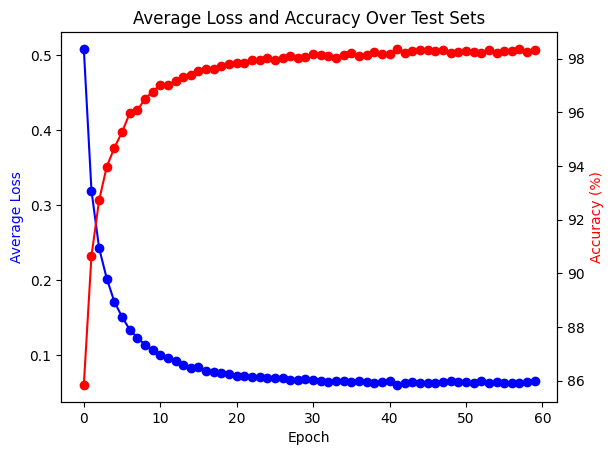

In [30]:
import matplotlib.pyplot as plt

# Data provided
data = {
    "Average Loss": loss_arr,
    "Accuracy": acc_arr  # Converting to percentage
}


# Create the figure and axis
fig, ax1 = plt.subplots()

# Plot Average Loss
ax1.plot(data["Average Loss"], 'bo-', label='Average Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Average Loss', color='b')

# Create another y-axis for Accuracy
ax2 = ax1.twinx()
ax2.plot(data["Accuracy"], 'ro-', label='Accuracy')
ax2.set_ylabel('Accuracy (%)', color='r')

# Add a title
plt.title('Average Loss and Accuracy Over Test Sets')

# Show the plot
plt.show()
